In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ml_library import NeuralNetwork , z_score_normalization , train_test_split

In [41]:
df = pd.read_csv('./dataset/train_nn.csv')
df_test = pd.read_csv('./dataset/test_nn.csv')
df.shape

(16000, 23)

In [42]:
df_test.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20'],
      dtype='object')

In [43]:
df.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20', 'target_cls', 'target_reg'],
      dtype='object')

In [44]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,target_cls,target_reg


In [45]:
df.head()

,Unnamed: 0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,target_cls,target_reg
0,0,4,7,5,5,4,6,7,3,7,...,3,8,4,8,15.70,8.75,4.69,32.7,5,7.39
1,1,4,7,6,5,5,6,8,3,7,...,3,8,4,7,18.84,8.75,4.69,32.7,5,7.83
2,2,3,5,4,3,3,7,8,5,5,...,5,9,2,6,12.56,6.25,3.35,52.5,14,6.28
3,3,4,10,6,7,6,5,7,5,7,...,3,8,6,9,18.84,8.75,6.70,54.0,11,8.74
4,4,4,10,6,8,4,8,11,2,3,...,3,11,1,8,18.84,3.75,6.70,23.4,22,9.76


In [46]:
#Regression Model
X = df.drop(columns=['target_cls','target_reg','Unnamed: 0'], axis=1).values
y = df['target_reg'].values.reshape(-1, 1)
X_test = df_test.drop('Unnamed: 0', axis=1).values
X.shape, y.shape

((16000, 20), (16000, 1))

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train = z_score_normalization(X_train)
X_val = z_score_normalization(X_val)  
X_test = z_score_normalization(X_test)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12800, 20), (3200, 20), (12800, 1), (3200, 1))

In [48]:
nn = NeuralNetwork(
    learning_rate=0.06, 
    epochs=1000, 
    loss_function='mse',
    initialization='he',
    optimizer='adam',
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-6
    )
model = nn.Sequential(
    nn.Dense(100 , activation='relu'),
    nn.Dense(50 , activation='relu'),
    nn.Dense(1 , activation='linear')
)
nn.fit(X_train, y_train, model)
# 0.06 -> 0.0007645426652382597

Epoch 0: Loss 45.24641005737369
Epoch 100: Loss 0.9648517428981002
Epoch 200: Loss 0.25090683356091575
Epoch 300: Loss 0.1027648754355937
Epoch 400: Loss 0.0565989312182622
Epoch 500: Loss 0.03690543928098854
Epoch 600: Loss 0.026446249392461655
Epoch 700: Loss 0.020407880788540805
Epoch 800: Loss 0.01662029617115869
Epoch 900: Loss 0.013991000860451613


{'layers': ({'units': 100, 'activation': 'relu'},
  {'units': 50, 'activation': 'relu'},
  {'units': 1, 'activation': 'linear'}),
 'parameters': {'w1': array([[-0.40636517, -0.34070996,  0.26309813, ..., -0.47763263,
           0.09746454,  0.20748061],
         [ 0.51182016, -0.18575077, -0.38363165, ...,  0.31939934,
          -0.03958868,  0.41350929],
         [-0.24349811,  0.25670214, -0.41051873, ..., -0.10611872,
           0.6323335 ,  0.61531934],
         ...,
         [-0.15858301, -0.1839936 , -0.3289556 , ...,  0.49940674,
          -0.31446448, -0.27937435],
         [-0.28632329, -0.16643741, -0.49490653, ..., -0.33474164,
           0.18241812, -0.09301317],
         [-0.21449796, -0.39034589,  0.00243342, ..., -0.11545354,
           0.04863579, -0.17969301]], shape=(20, 100)),
  'b1': array([[ 1.10212082e-01, -5.50330782e-01,  5.13923984e-01,
          -3.92952298e-01, -5.94926156e-01, -3.37833394e-01,
          -1.72834320e-01, -5.83896934e-01, -2.43027436e-01,
    

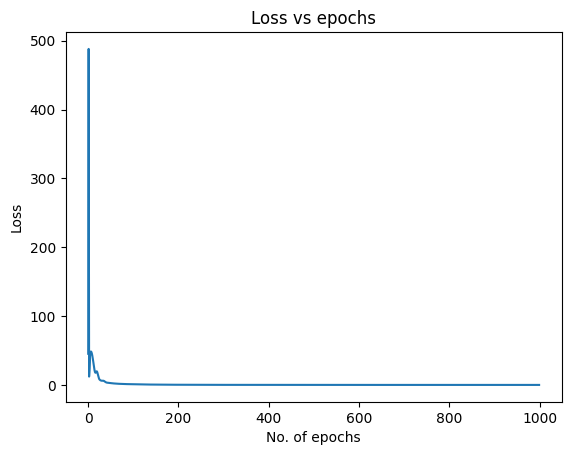

In [49]:
nn.plot_loss()

In [50]:
y_pred = nn.predict(X_val, model=model)
y_pred


array([[ 7.01395178],
       [ 9.79565218],
       [10.04402466],
       ...,
       [ 7.22926206],
       [10.29442636],
       [ 6.39860485]], shape=(3200, 1))

In [51]:
nn.evaluation_metrics(y_val, y_pred)

R2 Score: 0.9964307293399197
Mean Squared Error: 0.013620000434793002
Root Mean Squared Error: 0.11670475754995167
Mean Absolute Error: 0.08100150220135348


(np.float64(0.013620000434793002),
 np.float64(0.11670475754995167),
 np.float64(0.08100150220135348),
 np.float64(0.9964307293399197))

In [52]:
y_pred_test = nn.predict(X_test, model)

In [53]:
X_test.shape

(4000, 20)

In [54]:
df_test['target_reg'] = y_pred_test.reshape(-1)
df_test.to_csv('./output/submission_nn_regression.csv', index=False)